### hr analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('HR_analysis.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [10]:
df=df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'})

In [11]:
turnover=df['turnover']
df.drop(['turnover'],axis=1,inplace=True)
df.insert(0, 'turnover', turnover)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [12]:
df.shape

(14999, 10)

In [13]:
df.dtypes

turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department              object
salary                  object
dtype: object

In [14]:
df.turnover.value_counts()/14999

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [15]:
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [16]:
df.groupby(['turnover']).mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [17]:
corr=df.corr()
corr.columns

Index(['turnover', 'satisfaction', 'evaluation', 'projectCount',
       'averageMonthlyHours', 'yearsAtCompany', 'workAccident', 'promotion'],
      dtype='object')

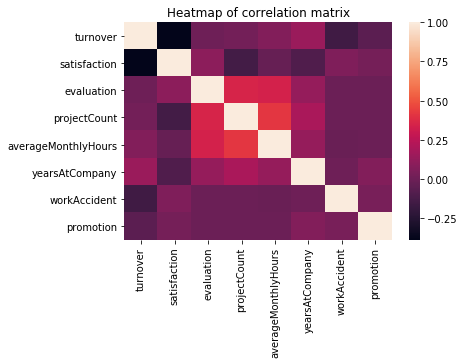

In [33]:
sns.heatmap(corr).set_title("Heatmap of correlation matrix")

In [24]:
import scipy.stats as stats
stats.ttest_1samp(df[df.turnover==1]['satisfaction'], popmean=df.satisfaction.mean())

Ttest_1sampResult(statistic=-39.10948894348423, pvalue=9.0127811954355001e-279)

In [27]:
degree_freedom = len(df[df['turnover']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.9606285216
The t-distribution right quartile range is: 1.9606285216


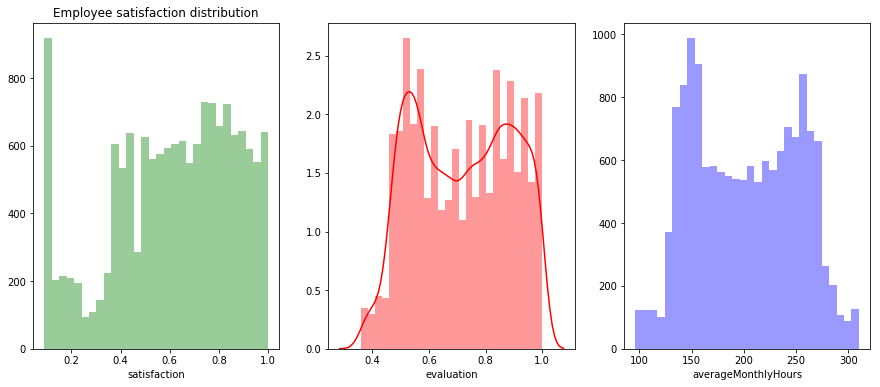

In [32]:
f, axes = plt.subplots(1,3, figsize=(15, 6))
sns.distplot(df.satisfaction, kde=False,color='g', ax=axes[0] ).set_title("Employee satisfaction distribution")
sns.distplot(df.evaluation, color='r', ax=axes[1])
sns.distplot(df.averageMonthlyHours, kde=False, color='b', ax=axes[2])

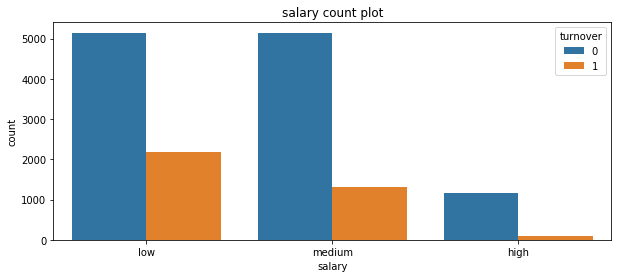

In [36]:
plt.figure(figsize=(10,4))
sns.countplot('salary', data=df, hue='turnover').set_title("salary count plot")

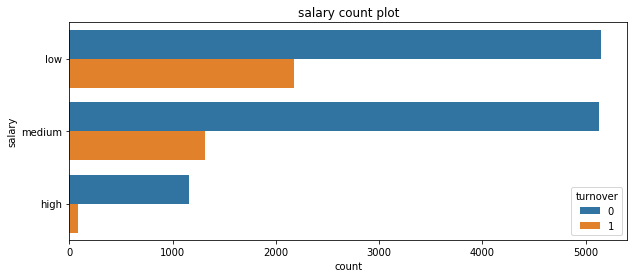

In [37]:
plt.figure(figsize=(10,4))
sns.countplot(y='salary', data=df, hue='turnover').set_title("salary count plot")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

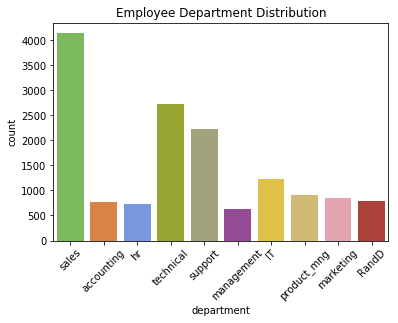

In [38]:
# Employee distri
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='department', data=df, palette=color_types).set_title('Employee Department Distribution');

plt.xticks(rotation=45)

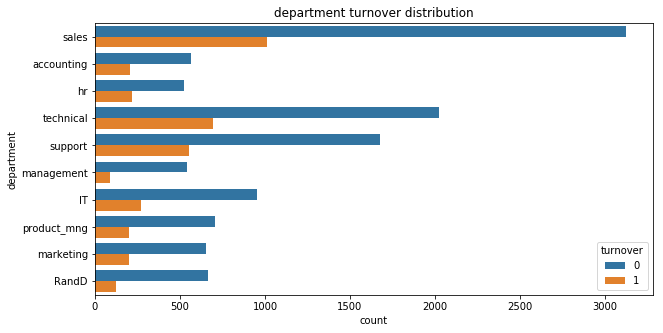

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(y='department', hue='turnover', data=df).set_title("department turnover distribution")

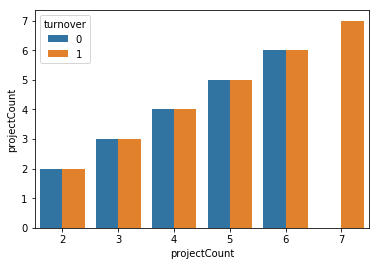

In [41]:
sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df)


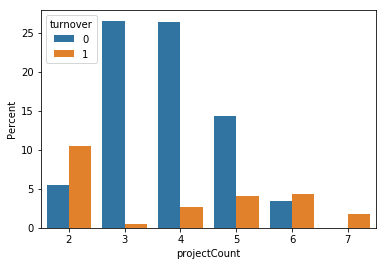

In [40]:
g = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
g.set(ylabel='Percent')

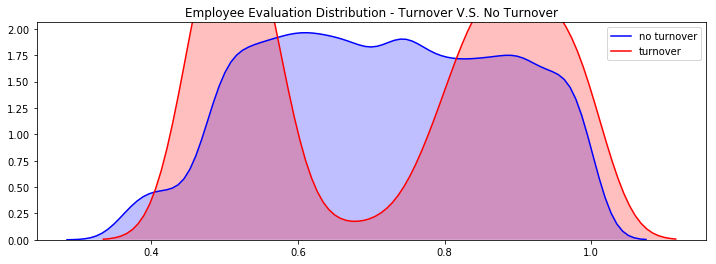

In [47]:
plt.figure(figsize=(12,4))
sns.kdeplot(df[df.turnover==0]['evaluation'], color='b', shade=True, label='no turnover')
sns.kdeplot(df.evaluation[df.turnover==1], color='r',shade=True, label='turnover')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

In [48]:
np.unique(df.evaluation[df.turnover==1]==df[df.turnover==1]['evaluation'])

array([ True], dtype=bool)

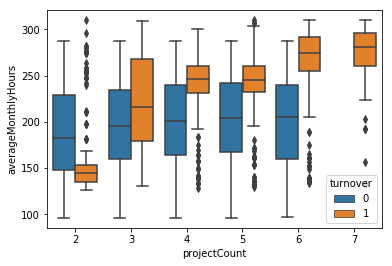

In [49]:
sns.boxplot('projectCount', 'averageMonthlyHours', hue='turnover', data=df)

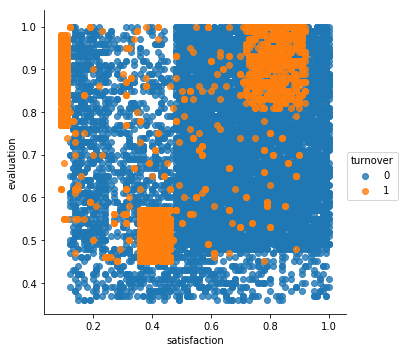

In [51]:
sns.lmplot('satisfaction','evaluation', hue='turnover', data=df, fit_reg=False)

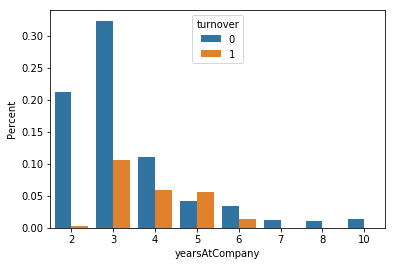

In [52]:
g=sns.barplot('yearsAtCompany', 'yearsAtCompany', hue='turnover', data=df, estimator=lambda x: len(x)/len(df))
g.set(ylabel='Percent')

In [53]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3, random_state=2)
kmeans.fit(df[df.turnover==1][['satisfaction','evaluation']])


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [54]:
kmeans.labels_

array([1, 0, 2, ..., 1, 2, 1])

In [56]:
centers=kmeans.cluster_centers_

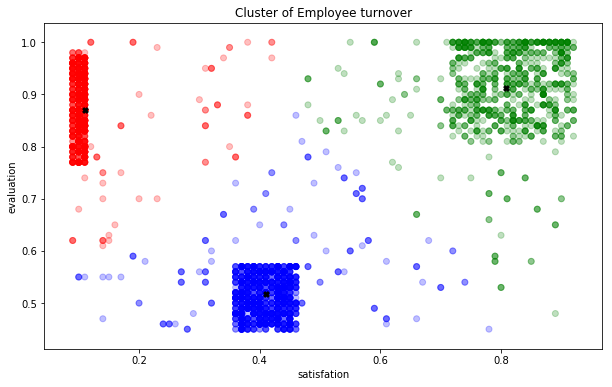

In [59]:
clr=['green' if c==0 else 'blue' if c==1 else 'red' for c in kmeans.labels_]
plt.figure(figsize=(10,6))
plt.scatter('satisfaction', 'evaluation', data=df[df.turnover==1], alpha=0.25, color=clr)
plt.xlabel('satisfation')
plt.ylabel('evaluation')
plt.scatter(x=centers[:,0], y=centers[:,1], color='black', marker='X', s=30)
plt.title('Cluster of Employee turnover')
plt.show()

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score
from sklearn.metrics import recall_score, confusion_matrix, precision_recall_curve

In [64]:
pd.get_dummies(df.department, prefix='dep').columns

Index(['dep_IT', 'dep_RandD', 'dep_accounting', 'dep_hr', 'dep_management',
       'dep_marketing', 'dep_product_mng', 'dep_sales', 'dep_support',
       'dep_technical'],
      dtype='object')

In [67]:
dep=pd.get_dummies(df.department, prefix='dep')
sal=pd.get_dummies(df.salary, prefix='sal')
df=pd.concat([df, dep, sal], axis=1)
df.columns

Index(['turnover', 'satisfaction', 'evaluation', 'projectCount',
       'averageMonthlyHours', 'yearsAtCompany', 'workAccident', 'promotion',
       'department', 'salary', 'dep_IT', 'dep_RandD', 'dep_accounting',
       'dep_hr', 'dep_management', 'dep_marketing', 'dep_product_mng',
       'dep_sales', 'dep_support', 'dep_technical', 'sal_high', 'sal_low',
       'sal_medium'],
      dtype='object')

In [68]:
df. drop(['department', 'salary'], axis=1, inplace=True)
df.columns

Index(['turnover', 'satisfaction', 'evaluation', 'projectCount',
       'averageMonthlyHours', 'yearsAtCompany', 'workAccident', 'promotion',
       'dep_IT', 'dep_RandD', 'dep_accounting', 'dep_hr', 'dep_management',
       'dep_marketing', 'dep_product_mng', 'dep_sales', 'dep_support',
       'dep_technical', 'sal_high', 'sal_low', 'sal_medium'],
      dtype='object')

In [69]:
X=df.drop(['turnover'], axis=1)
X=RobustScaler().fit_transform(X)
y=df['turnover']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.15, random_state=123, stratify=y)

In [73]:
clf=LogisticRegression(penalty='l2', C=1)
clf.fit(X_train, y_train)
print("accuracy score is: %.2f" % accuracy_score(y_test, clf.predict(X_test)))

accuracy score is: 0.79


In [79]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(LogisticRegression(class_weight='balanced'), X_train, y_train, cv=10, scoring='roc_auc' )
print('AUC: %.3f (%.3f)' % (score.mean(), score.std()))

AUC: 0.829 (0.012)


In [82]:
logis=LogisticRegression(class_weight='balanced')
logis.fit(X_train, y_train)
print(classification_report(y_test, logis.predict(X_test)))

             precision    recall  f1-score   support

          0       0.92      0.75      0.83      1714
          1       0.50      0.80      0.62       536

avg / total       0.82      0.76      0.78      2250



In [85]:
from sklearn.metrics import roc_auc_score
roc_socre=roc_auc_score(y_test, logis.predict(X_test))

In [84]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold=roc_curve(y_test, logis.predict_proba(X_test)[:,1])


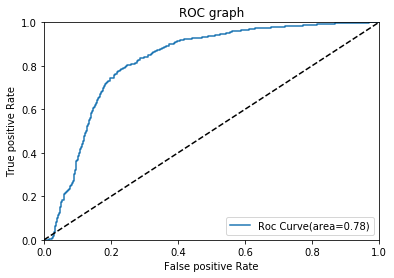

In [90]:
plt.plot(fpr, tpr, label='Roc Curve(area=%.2f)' % roc_socre)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False positive Rate')
plt.ylabel("True positive Rate")
plt.title('ROC graph')
plt.legend(loc='lower right')
plt.show()